In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC  
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

In [3]:
uploaded = files.upload()

Saving breast-cancer.data to breast-cancer.data


In [4]:
df = pd.read_csv("breast-cancer.data",sep=',',header=None,names=["Class","age","menopause","tumor-size","inv-nodes","node-caps","deg-malig","breast","breast-quad","irradiat"])
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [5]:
print(f"The data contains {df.shape[0]} instances.")
print(f"The number of no-recurrence-events instances is {len([1 for val in df.loc[:,'Class'] if val == 'no-recurrence-events'])}.")
print(f"The number of recurrence-events instances is {len([1 for val in df.loc[:,'Class'] if val == 'recurrence-events'])}.")

The data contains 286 instances.
The number of no-recurrence-events instances is 201.
The number of recurrence-events instances is 85.


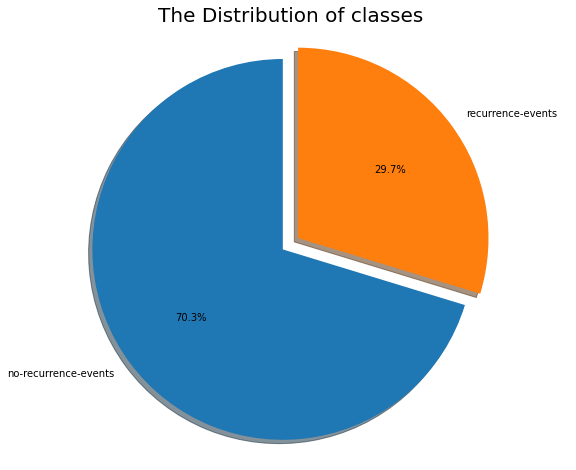

In [6]:
labels = 'no-recurrence-events', 'recurrence-events'
sizes = [len([1 for val in df.loc[:,'Class'] if val == 'no-recurrence-events']), len([1 for val in df.loc[:,'Class'] if val == 'recurrence-events'])]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("The Distribution of classes", size = 20)
plt.show()

## This function returns the indexes' list of all rows which have missing value

In [7]:
def deleteRows(data,str):
  lst = []
  attributeName = []
  for column in data:
    for counter,val in enumerate(data.loc[:,column]):
      if str == val:
        if column not in attributeName:
          attributeName.append(column)
        lst.append(counter)
  df.drop(lst,inplace=True)
  print(f"There are missing values denoted by (?) in these attributs {attributeName}")

In [8]:
deleteRows(df,'?')

There are missing values denoted by (?) in these attributs ['node-caps', 'breast-quad']


In [9]:
print(f"The data contains {df.shape[0]} instances after the removing process.")
print(f"The number of no-recurrence-events instances is {len([1 for val in df.loc[:,'Class'] if val == 'no-recurrence-events'])}.")
print(f"The number of recurrence-events instances is {len([1 for val in df.loc[:,'Class'] if val == 'recurrence-events'])}.")

The data contains 277 instances after the removing process.
The number of no-recurrence-events instances is 196.
The number of recurrence-events instances is 81.


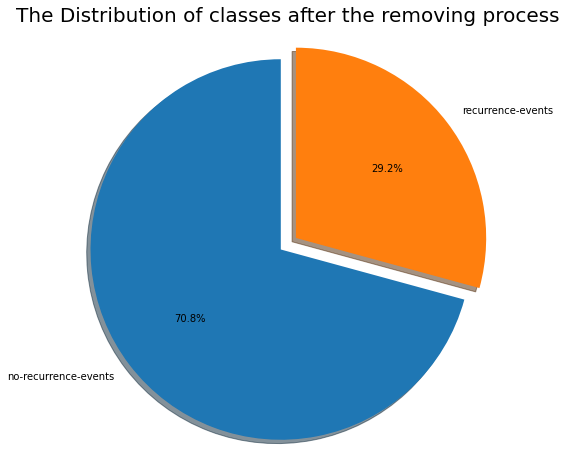

In [10]:
labels = 'no-recurrence-events', 'recurrence-events'
sizes = [len([1 for val in df.loc[:,'Class'] if val == 'no-recurrence-events']), len([1 for val in df.loc[:,'Class'] if val == 'recurrence-events'])]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title("The Distribution of classes after the removing process", size = 20)
plt.show()

## This attribute should be deleted because it does not matter where the cancer is located on the right or left side

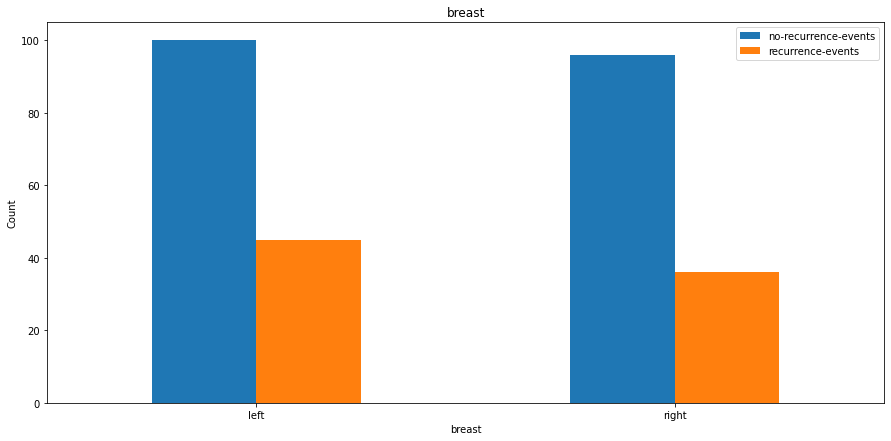

In [11]:
pd.crosstab(df['breast'],df['Class']).plot(kind="bar",figsize=(15,7))
plt.title('breast')
plt.xticks(rotation=0)
plt.legend(["no-recurrence-events", "recurrence-events"])
plt.ylabel('Count')
plt.show()

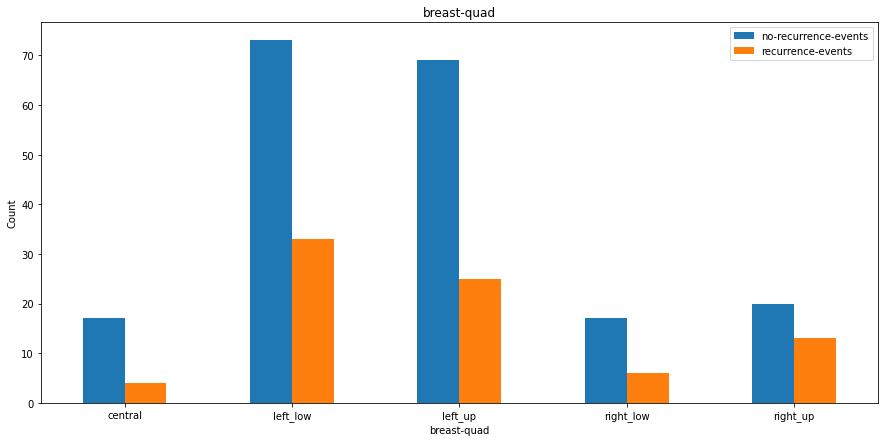

In [12]:
pd.crosstab(df['breast-quad'],df['Class']).plot(kind="bar",figsize=(15,7))
plt.title('breast-quad')
plt.xticks(rotation=0)
plt.legend(["no-recurrence-events", "recurrence-events"])
plt.ylabel('Count')
plt.show()

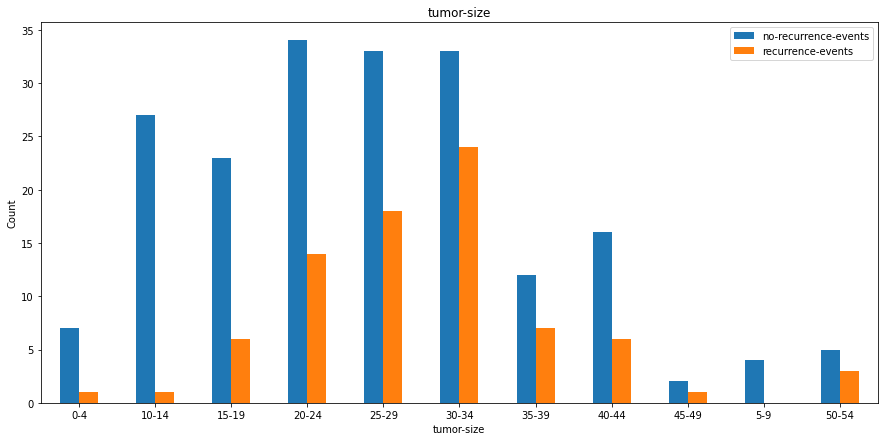

In [13]:
pd.crosstab(df['tumor-size'],df['Class']).plot(kind="bar",figsize=(15,7))
plt.title('tumor-size')
plt.xticks(rotation=0)
plt.legend(["no-recurrence-events", "recurrence-events"])
plt.ylabel('Count')
plt.show()

## Replacing the categorical data by numeric data by using the label encoder

In [14]:
le = preprocessing.LabelEncoder()

In [15]:
df['age'] = le.fit_transform(df['age'])
df['menopause'] = le.fit_transform(df['menopause'])
df['tumor-size'] = le.fit_transform(df['tumor-size'])
df['inv-nodes'] = le.fit_transform(df['inv-nodes'])
df['node-caps'] = le.fit_transform(df['node-caps'])
df['deg-malig'] = le.fit_transform(df['deg-malig'])
df['breast-quad'] = le.fit_transform(df['breast-quad'])
df['irradiat'] = le.fit_transform(df['irradiat'])
df['Class'] = le.fit_transform(df['Class'])
df['breast'] = le.fit_transform(df['breast'])


In [16]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,1,2,5,0,0,2,0,1,0
1,0,2,2,3,0,0,1,1,4,0
2,0,2,2,3,0,0,1,0,1,0
3,0,4,0,2,0,0,1,1,2,0
4,0,2,2,0,0,0,1,1,3,0


## Normalize the data by using the Min Max normalization which scale all the data to be between [0,1]

In [17]:
minVec = df.min().copy()
maxVec = df.max().copy()
df = (df - minVec)/(maxVec-minVec)
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0.0,0.2,1.0,0.5,0.0,0.0,1.0,0.0,0.25,0.0
1,0.0,0.4,1.0,0.3,0.0,0.0,0.5,1.0,1.00,0.0
2,0.0,0.4,1.0,0.3,0.0,0.0,0.5,0.0,0.25,0.0
3,0.0,0.8,0.0,0.2,0.0,0.0,0.5,1.0,0.50,0.0
4,0.0,0.4,1.0,0.0,0.0,0.0,0.5,1.0,0.75,0.0


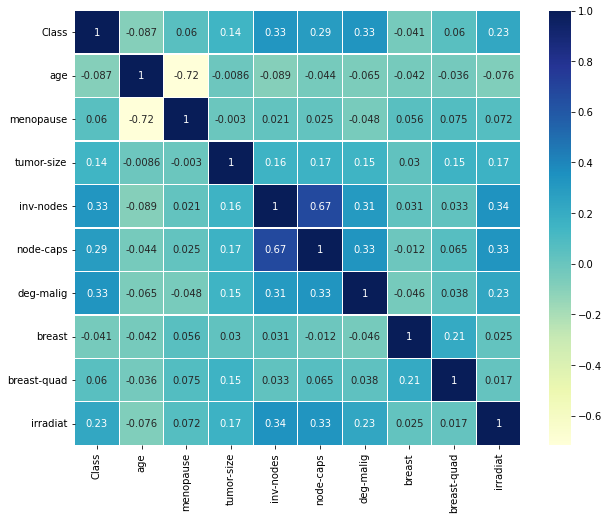

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

[Text(0, 0, 'age'),
 Text(0, 0, 'menopause'),
 Text(0, 0, 'tumor-size'),
 Text(0, 0, 'inv-nodes'),
 Text(0, 0, 'node-caps'),
 Text(0, 0, 'deg-malig'),
 Text(0, 0, 'breast'),
 Text(0, 0, 'breast-quad'),
 Text(0, 0, 'irradiat')]

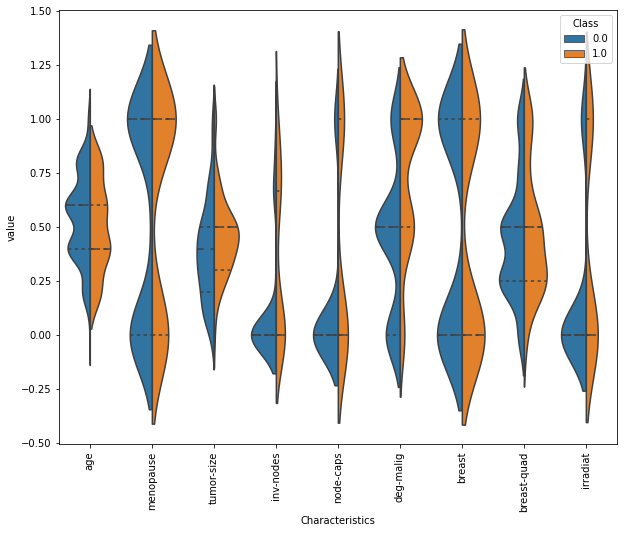

In [19]:
# The violin plot 
df_div = pd.melt(df, 'Class', var_name="Characteristics")
fig, ax = plt.subplots(figsize=(10,8))
p = sns.violinplot(ax = ax, x="Characteristics", y="value", hue='Class', split = True, data=df_div,inner = 'quartile')
df_no_class = df.drop(["Class"],axis = 1)
p.set_xticklabels(rotation = 90, labels = list(df_no_class.columns))

## Split the data to train and test data

In [20]:
df.drop(["breast"],axis = 1,inplace=True)
X = df.drop(['Class'], axis=1)
y = df['Class']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)
print('Train set Shape : ',X_train.shape)
print('Test set Shape : ',X_test.shape)

Train set Shape :  (207, 8)
Test set Shape :  (70, 8)


##Gaussian Naive Bayes

In [ ]:
classifier_GNB = GaussianNB()
classifier_GNB = classifier_GNB.fit(X_train, y_train)
y_pred_GNB=classifier_GNB.predict(X_test)

In [ ]:
print(f"method: naive_bayes; metric: accuracy_score; {accuracy_score(y_test, y_pred_GNB)}")

method: naive_bayes; metric: accuracy_score; 0.6714285714285714


Text(0.5, 15.0, 'Predicted label')

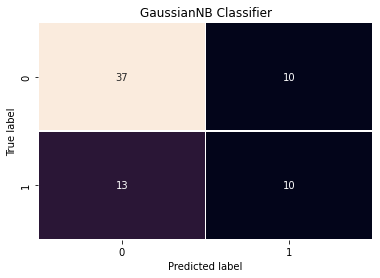

In [ ]:
cfm = confusion_matrix(y_test, y_pred_GNB)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('GaussianNB Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Support vector machines

In [ ]:
classifier_svm = SVC(C=1.5, kernel="linear")
classifier_svm = classifier_svm.fit(X_train, y_train)
y_pred_svm=classifier_svm.predict(X_test)

In [ ]:
print(f"method: SVM; metric: accuracy_score; {accuracy_score(y_test, y_pred_svm)}")

method: SVM; metric: accuracy_score; 0.6714285714285714


Text(0.5, 15.0, 'Predicted label')

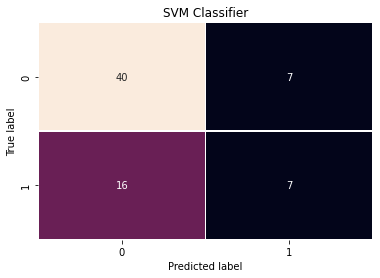

In [ ]:
cfm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('SVM Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Tuning the Support vector machines Model

In [ ]:
param_grid = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}

In [ ]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
grid.fit(X_train,y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END ........................C=0.1, gamma=1, kernel=poly; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, kernel=sigmoid; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, k

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [ ]:
print(grid.best_estimator_)

SVC(C=1, gamma=1, kernel='poly')


In [ ]:
y_pred_svm2=grid.predict(X_test)

In [ ]:
print(f"method: SVM after tuning the hyperparameters; metric: accuracy_score; {accuracy_score(y_test, y_pred_svm2)}")

method: SVM after tuning the hyperparameters; metric: accuracy_score; 0.6571428571428571


Text(0.5, 15.0, 'Predicted label')

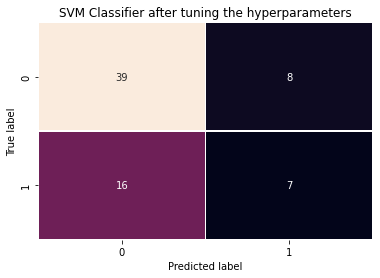

In [ ]:
cfm = confusion_matrix(y_test, y_pred_svm2)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('SVM Classifier after tuning the hyperparameters')
plt.ylabel('True label')
plt.xlabel('Predicted label')

##A random forest classifier

In [ ]:
classifier_RFC = RandomForestClassifier()
classifier_RFC = classifier_RFC.fit(X_train, y_train)
y_pred_RFC=classifier_RFC.predict(X_test)

In [ ]:
print(f"method: Random Forest Classifier; metric: accuracy_score; {accuracy_score(y_test, y_pred_RFC)}")

method: Random Forest Classifier; metric: accuracy_score; 0.6285714285714286


Text(0.5, 15.0, 'Predicted label')

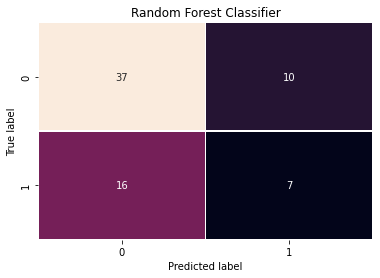

In [ ]:
cfm = confusion_matrix(y_test, y_pred_RFC)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Random Forest Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')

##Tuning the random forest classifier

In [ ]:
random_grid = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [600, 800, 1000, 1200, 1400, 1600, 1800, 2000,2200,2400]}

In [ ]:
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [ ]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [600, 800, 1000, 1200,
                                                         1400, 1600, 1800, 2000,
                                                         2200, 2400]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 1400}

In [ ]:
y_pred_RFC2=rf_random.predict(X_test)

In [ ]:
print(f"method: Random Forest Classifier after tuning the hyperparameters; metric: accuracy_score; {accuracy_score(y_test, y_pred_RFC2)}")

method: Random Forest Classifier after tuning the hyperparameters; metric: accuracy_score; 0.7142857142857143


Text(0.5, 18.5, 'Predicted label')

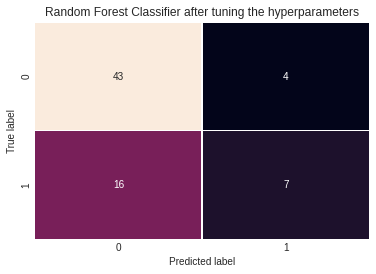

In [ ]:
cfm = confusion_matrix(y_test, y_pred_RFC2)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Random Forest Classifier after tuning the hyperparameters')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Tuning the random forest classifier, second way

In [ ]:
seed = 13
from sklearn.model_selection import KFold
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

In [ ]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(classifier_RFC.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


In [ ]:
#from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [10, 20, 30, 40, 50, 60, 70],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]}

In [ ]:
# Grid search of parameters, using 3 fold cross validation,
CV_rf = GridSearchCV(estimator=classifier_RFC, param_grid=param_grid, cv= kfold ,n_jobs=1)

# Use the grid to search for best hyperparameters
# Fit the Grid search model
CV_rf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=13, shuffle=True),
             estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': [10, 20, 30, 40, 50, 60, 70],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200, 300]})

In [ ]:
CV_rf.best_params_


{'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
best_random = CV_rf.best_estimator_
rfff_predictions = best_random.predict(X_test)

In [ ]:
print(f"method: Random Forest Classifier after tuning the hyperparameters, second way; metric: accuracy_score; {accuracy_score(y_test, rfff_predictions)}")

method: Random Forest Classifier after tuning the hyperparameters, second way; metric: accuracy_score; 0.7142857142857143


Text(0.5, 18.5, 'Predicted label')

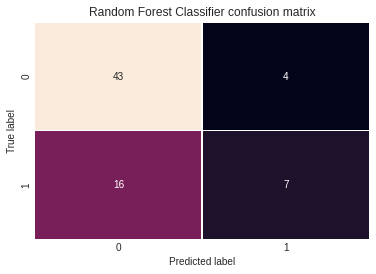

In [ ]:
rfm = confusion_matrix(y_test, rfff_predictions)
sns.heatmap(rfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Random Forest Classifier confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')


##Decision Trees

In [ ]:
from sklearn import  tree
classifier_tree = tree.DecisionTreeClassifier()
classifier_tree = classifier_tree.fit(X_train, y_train)
y_pred_tree=classifier_tree.predict(X_test)

In [ ]:
print(f"method: Decision Tree Classifier; metric: accuracy_score; {accuracy_score(y_test, y_pred_tree)}")

method: Decision Tree Classifier; metric: accuracy_score; 0.6571428571428571


Text(0.5, 15.0, 'Predicted label')

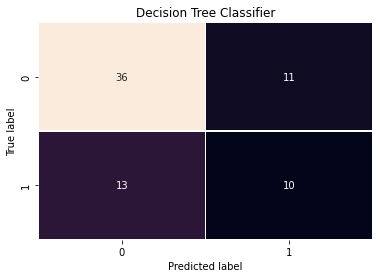

In [ ]:
cfm = confusion_matrix(y_test, y_pred_tree)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Decision Trees after tuning the hyperparameters

In [ ]:
param_dict = {'criterion': ['gini', 'enteropy'],
 'max_depth': range(1,10),
 'min_samples_split': range(1,10),
 'min_samples_leaf': range(1,5),
}

In [ ]:
grid = GridSearchCV(estimator=tree.DecisionTreeClassifier(), param_grid=param_dict, verbose=1, cv=10, n_jobs=-1)

In [ ]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a fl

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'enteropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)},
             verbose=1)

In [ ]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 2,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [ ]:
y_pred_tree2=grid.predict(X_test)

In [ ]:
print(f"method: Decision Tree Classifier after tuning the hyperparameters; metric: accuracy_score; {accuracy_score(y_test, y_pred_tree2)}")

method: Decision Tree Classifier after tuning the hyperparameters; metric: accuracy_score; 0.6857142857142857


Text(0.5, 15.0, 'Predicted label')

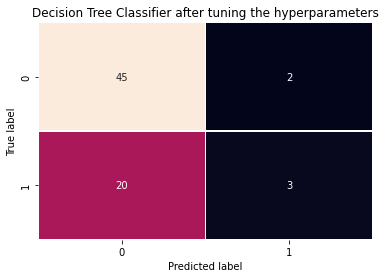

In [ ]:
cfm = confusion_matrix(y_test, y_pred_tree2)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('Decision Tree Classifier after tuning the hyperparameters')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred_knn=knn.predict(X_test)

In [ ]:
print(f"method: knn Classifier after tuning the hyperparameters; metric: accuracy_score; {accuracy_score(y_test, y_pred_knn)}")

method: Decision Tree Classifier after tuning the hyperparameters; metric: accuracy_score; 0.6857142857142857


Text(0.5, 15.0, 'Predicted label')

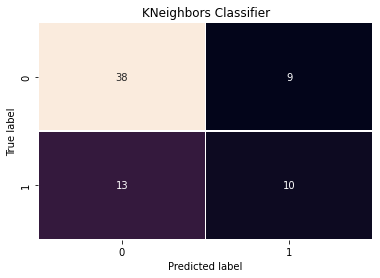

In [ ]:
cfm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('KNeighbors Classifier')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## KNeighbors Classifier after tuning the hyperparameters



In [ ]:
# check all values of K between 1 and 20
error_rate = []
scores = []
for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    score=accuracy_score(y_test,pred_i)
    scores.append(score)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

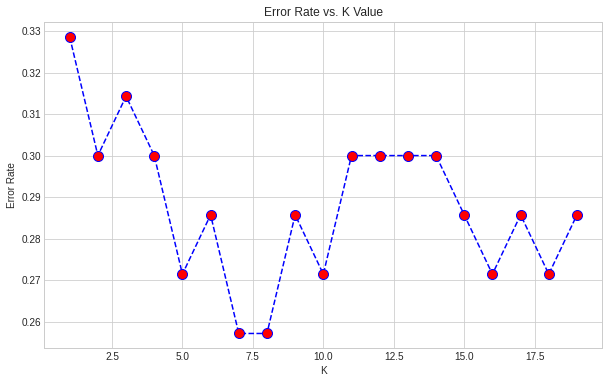

In [ ]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(10,6))
plt.plot(range(1,20),error_rate,color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
y_pred_knn=knn.predict(X_test)

In [ ]:
print(f"method: knn Classifier after tuning the hyperparameters; metric: accuracy_score; {accuracy_score(y_test, y_pred_knn)}")

method: knn Classifier after tuning the hyperparameters; metric: accuracy_score; 0.7428571428571429


Text(0.5, 18.5, 'Predicted label')

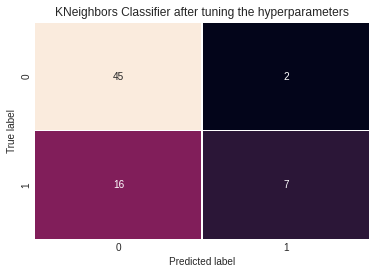

In [ ]:
cfm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cfm, annot = True,  linewidths=.5, cbar =None)
plt.title('KNeighbors Classifier after tuning the hyperparameters')
plt.ylabel('True label')
plt.xlabel('Predicted label')

## Clustering Part

In [ ]:
XX = df[['tumor-size','breast-quad']]
kmeans = KMeans(n_clusters=2).fit(XX)
centroids = kmeans.cluster_centers_
print(centroids)

[[0.44285714 0.89732143]
 [0.39773756 0.33257919]]


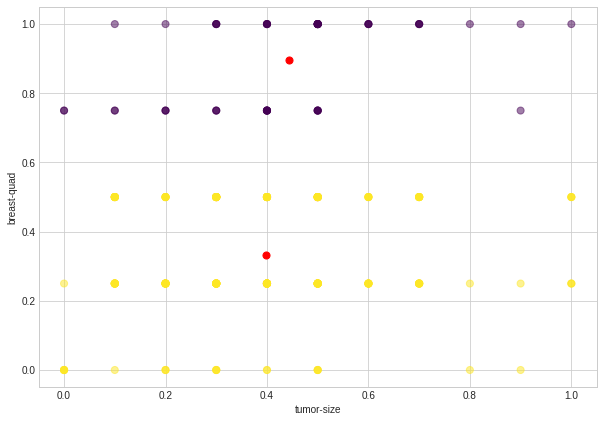

In [ ]:
pre_kmeans = kmeans.predict(XX)
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(XX['tumor-size'], XX['breast-quad'], c= pre_kmeans, s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
ax.set_xlabel('tumor-size') 
ax.set_ylabel('breast-quad')
plt.show()

## Result Evaluation
Elbow Method

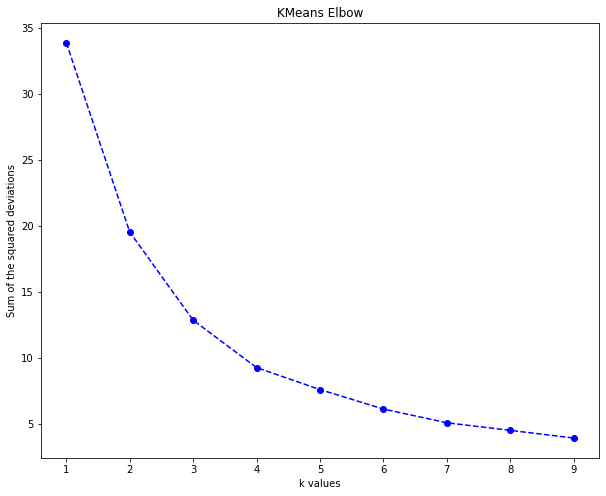

In [ ]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(XX)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(10,8))
plt.plot(K, distortions, 'bo--')
plt.title('KMeans Elbow')
plt.xlabel('k values')
plt.ylabel('Sum of the squared deviations')
plt.show()

##Silhouette Method

In [ ]:
# The silhouette for K=2
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_score(X=XX,labels=kmeans.labels_,metric='euclidean')


0.4734076188042713

In [ ]:
# The silhouette for K=3
kmeans2 = KMeans(n_clusters=3).fit(XX)
centroids2 = kmeans2.cluster_centers_
silhouette_score(X=XX,labels=kmeans2.labels_,metric='euclidean')

0.4005632740559488

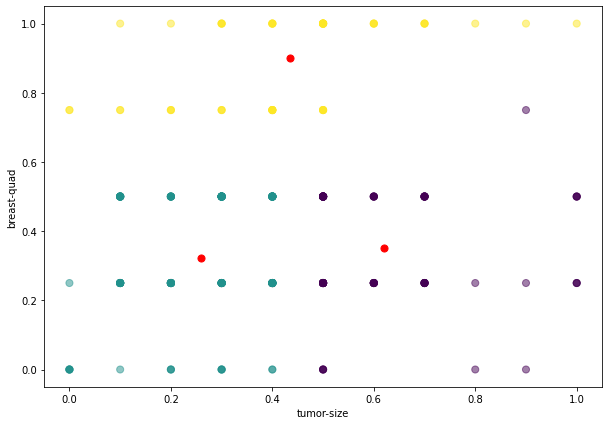

In [ ]:
pre_kmeans2 = kmeans2.predict(XX)
fig, ax = plt.subplots(figsize=(10,7))
plt.scatter(XX['tumor-size'], XX['breast-quad'], c= pre_kmeans2, s=50, alpha=0.5, cmap='viridis')
plt.scatter(centroids2[:, 0], centroids2[:, 1], c='red', s=50)
ax.set_xlabel('tumor-size') 
ax.set_ylabel('breast-quad')
plt.show()

In [24]:
pip install fpgrowth_py

In [26]:
itemSetList = np.array(df)

In [27]:
from fpgrowth_py import fpgrowth
freqItemSet, rules = fpgrowth(itemSetList , minSupRatio=0.5, minConf=0.5)
print(freqItemSet)

[{0.4}, {0.4, 0.5}, {0.4, 0.5, 1.0}, {0.4, 0.5, 1.0}, {0.4, 0.5, 1.0, 0.0}, {0.4, 0.5, 1.0, 0.0}, {0.4, 0.5, 1.0, 0.0}, {0.4, 0.5, 1.0, 0.0}, {0.4, 0.5, 1.0, 0.0}, {0.4, 0.5, 0.0}, {0.4, 0.5, 0.0}, {0.4, 0.5, 0.0}, {0.4, 0.5, 0.0}, {0.4, 1.0}, {0.4, 1.0}, {0.4, 1.0}, {0.4, 1.0, 0.0}, {0.4, 1.0, 0.0}, {0.4, 1.0, 0.0}, {0.4, 1.0, 0.0}, {0.4, 1.0, 0.0}, {0.4, 1.0, 0.0}, {0.4, 1.0, 0.0}, {0.4, 1.0, 0.0}, {0.4, 0.0}, {0.4, 0.0}, {0.4, 0.0}, {0.4, 0.0}, {0.5}, {0.5, 1.0}, {0.5, 1.0}, {0.5, 1.0}, {0.5, 1.0, 0.0}, {0.5, 1.0, 0.0}, {0.5, 1.0, 0.0}, {0.5, 1.0, 0.0}, {0.5, 1.0, 0.0}, {0.5, 1.0, 0.0}, {0.5, 1.0, 0.0}, {0.5, 1.0, 0.0}, {0.5, 0.0}, {0.5, 0.0}, {0.5, 0.0}, {0.5, 0.0}, {0.5, 0.0}, {1.0}, {1.0}, {1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0, 1.0}, {0.0}, {0.0}, {0.0}, {0.0}, {0.0}]


In [28]:
print(rules)

[[{0.4}, {0.5}, 0.7479674796747967], [{0.4}, {0.5, 1.0}, 0.7073170731707317], [{0.4, 0.5}, {1.0}, 0.9456521739130435], [{0.4, 1.0}, {0.5}, 0.75], [{0.5, 1.0}, {0.4}, 0.5087719298245614], [{0.4}, {0.5, 1.0}, 0.7073170731707317], [{0.4, 0.5}, {1.0}, 0.9456521739130435], [{0.4, 1.0}, {0.5}, 0.75], [{0.5, 1.0}, {0.4}, 0.5087719298245614], [{0.4}, {0.5, 1.0, 0.0}, 0.6829268292682927], [{0.4, 0.5}, {0.0, 1.0}, 0.9130434782608695], [{0.4, 1.0}, {0.5, 0.0}, 0.7241379310344828], [{0.4, 0.0}, {0.5, 1.0}, 0.717948717948718], [{0.4, 0.5, 1.0}, {0.0}, 0.9655172413793104], [{0.4, 0.5, 0.0}, {1.0}, 0.9438202247191011], [{0.4, 1.0, 0.0}, {0.5}, 0.7636363636363637], [{0.4}, {0.5, 1.0, 0.0}, 0.6829268292682927], [{0.4, 0.5}, {0.0, 1.0}, 0.9130434782608695], [{0.4, 1.0}, {0.5, 0.0}, 0.7241379310344828], [{0.4, 0.0}, {0.5, 1.0}, 0.717948717948718], [{0.4, 0.5, 1.0}, {0.0}, 0.9655172413793104], [{0.4, 0.5, 0.0}, {1.0}, 0.9438202247191011], [{0.4, 1.0, 0.0}, {0.5}, 0.7636363636363637], [{0.4}, {0.5, 1.0, 0.